<a href="https://colab.research.google.com/github/Mashi007/Regresion/blob/Documentos/METRICAS_REGRESION_(V1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **1. Instalación de bibliotecas**

---

In [ ]:
!pip install fuzzywuzzy
!pip install mplcursors
!pip install pandas plotly
!pip install selenium
!pip install python-docx
!pip install python-Levenshtein
!pip install plotly
!pip install matplotlib
!pip install sklearn
!pip install seaborn
!pip install mpld3


---
# **2. Importación de librerias**

---

In [91]:
# Importar bibliotecas

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.datasets as datasets

# Importar Sub - Bibliotecas

from IPython.display import display,HTML

from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# Filtrado de advertencias

import warnings
warnings.filterwarnings('ignore')

---
# **3. Marco de datos**

---

In [123]:
# Importar el archivo CSV
datos = pd.read_csv("/content/BS.csv")

# Imprime las primeras filas del DataFrame
datos.head()


,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


---
# **4. Análisis exploratorio**

---

### 4.1  Estructura de la Matriz

In [124]:
datos.shape
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print("El DataFrame tiene", datos.shape[0], "filas y", datos.shape[1], "columnas.")


Respuesta:
El DataFrame tiene 506 filas y 7 columnas.


### 4.2  Identificación Dtype por variable

In [125]:
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
datos.info()

Respuesta:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [126]:
# Seleccionar columnas categóricas
cat_cols = datos.select_dtypes(include=['object']).columns.tolist()

# Seleccionar columnas numéricas
num_cols = datos.select_dtypes(include=['float', 'int']).columns.tolist()

#Imprimir
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")

# Imprimir las columnas seleccionadas
print("Columnas categóricas:", cat_cols)
print("Columnas numéricas:", num_cols)

Respuesta:
Columnas categóricas: []
Columnas numéricas: ['CRIM', 'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT', 'PRICE']


### 4.3  Análisis de dispersión

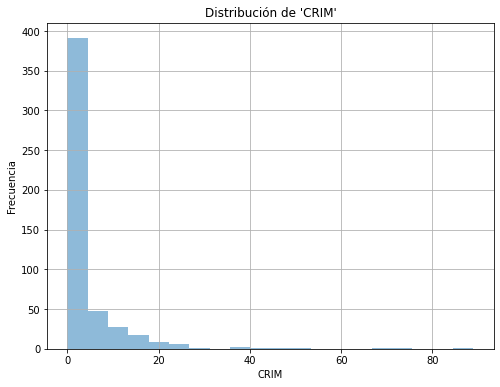

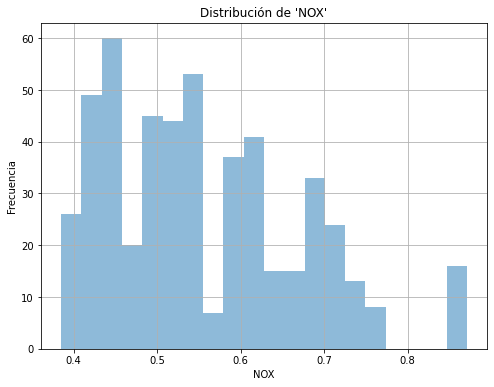

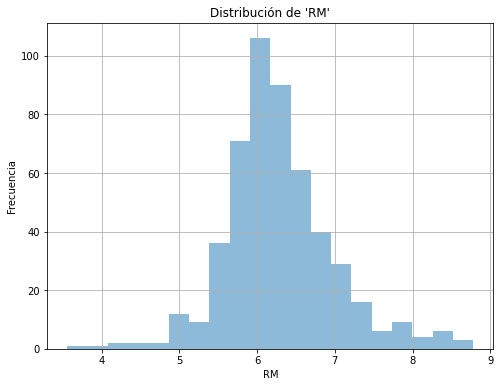

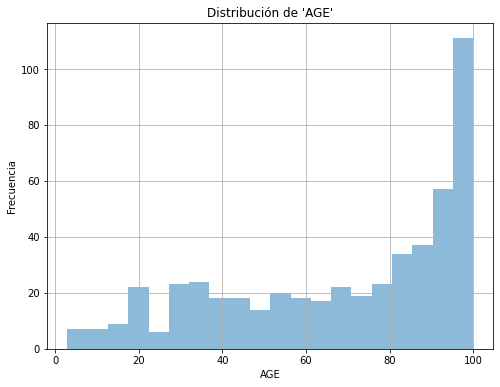

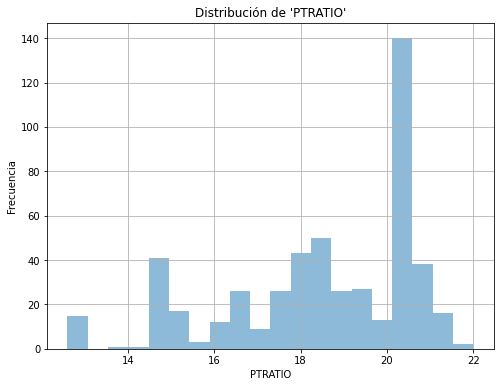

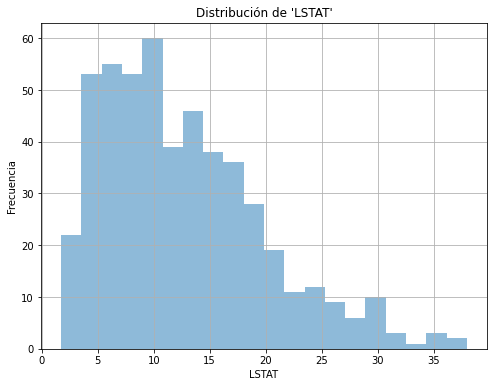

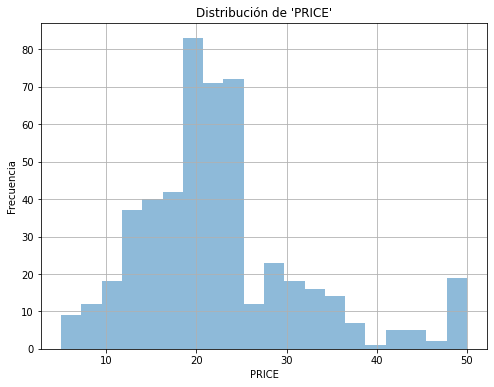

In [127]:
# Crear una función para describir características numéricas con histogramas
def desc_num_feature(data, num_cols):
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 6)
    data[num_cols].hist(bins=20, alpha=0.5, ax=ax)
    ax.set_xlabel(num_cols)
    ax.set_ylabel("Frecuencia")
    ax.set_title(f"Distribución de '{num_cols}'")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()

# Iterar a través de la lista de nombres de características numéricas y llamar a la función desc_num_feature para cada una
num_cols = ['CRIM', 'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT', 'PRICE']
for num_cols in num_cols:
    desc_num_feature(datos, num_cols)

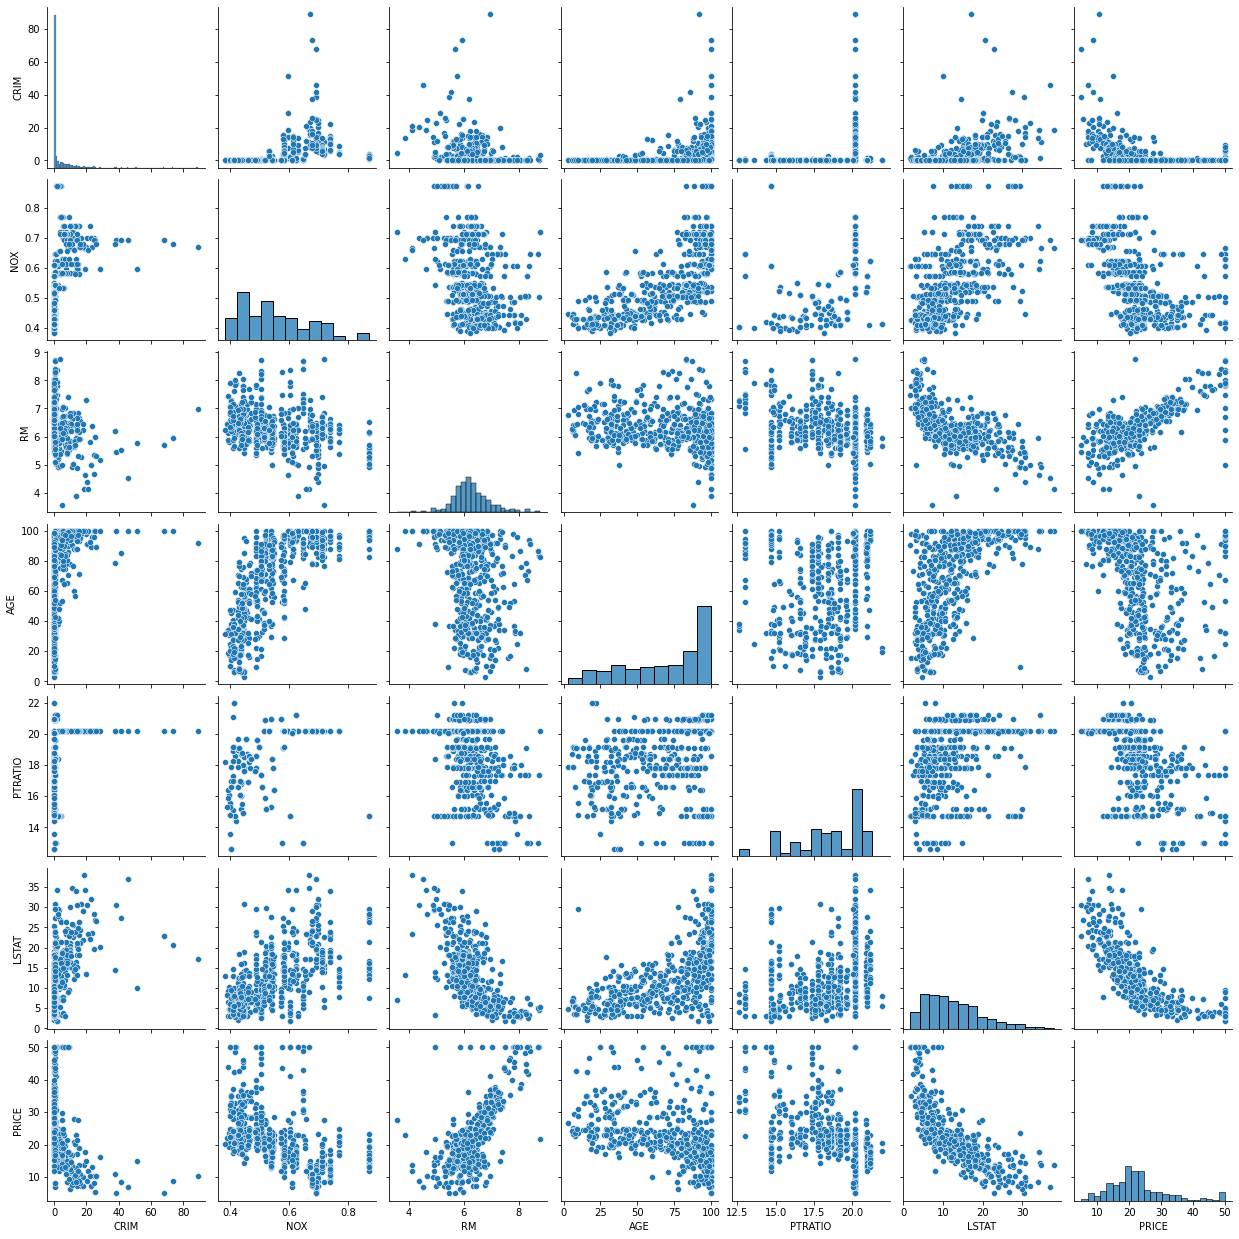

In [128]:
sns.pairplot(datos)
plt.show()

### 4.4  Análisis de correlación

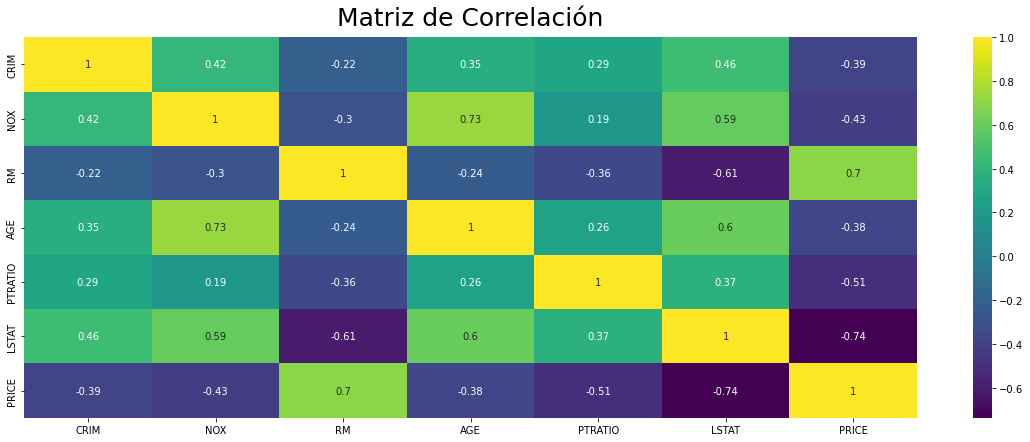

In [129]:
plt.figure(figsize=(20, 7))
heatmap = sns.heatmap(datos.corr(), cmap="viridis", annot=True)
heatmap.set_title("Matriz de Correlación", fontdict={"fontsize": 25}, pad=12)
plt.show()

In [205]:
# Calcular el percentil 5 de la columna "LSTAT"
q = datos["LSTAT"].quantile(0.05)
print(f"Percentil 5 de LSTAT: {q}")

# Filtrar el dataframe para eliminar valores por debajo del percentil 5
datos = datos[datos["LSTAT"] > q]
print(f"Tamaño del dataframe después de eliminar valores atípicos: {datos.shape}")



Percentil 5 de LSTAT: 4.56
Tamaño del dataframe después de eliminar valores atípicos: (410, 7)


---
# **5. Punto de Control**

---

In [130]:
# Generar una copia del DataFrame con otro nombre
df_V1_copy = datos.copy()

# Guardar el DataFrame modificado en un archivo CSV con un nuevo nombre y extensión
df_V1_copy.to_csv("/content/BOSTON_V1.csv", index=False)

# Importar el archivo CSV
df_V1 = pd.read_csv("/content/BOSTON_V1.csv")

---
# **6. Análisis de escenarios**

---

#### Escenario 1: PRICE vs Todos

In [169]:
E1 = smf.ols(formula="PRICE~CRIM+NOX+RM+AGE+PTRATIO+LSTAT", data=df_V1).fit()
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print(E1.summary())

Respuesta:
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     181.4
Date:                Sat, 25 Mar 2023   Prob (F-statistic):          5.90e-122
Time:                        13:05:40   Log-Likelihood:                -1547.4
No. Observations:                 506   AIC:                             3109.
Df Residuals:                     499   BIC:                             3138.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.5037      4.268      4.8

In [168]:
price_pred = E1.predict(pd.DataFrame(df_V1[["CRIM", "NOX", "RM", "AGE", "PTRATIO", "LSTAT"]]))
df_V1["RSE1"] = (df_V1["PRICE"] - price_pred)**2
SSD = sum(df_V1["RSE1"])
RSE1 = np.sqrt(SSD / (len(df_V1) - 1 - 1))
print("\033[43m\033[30m\033[1mECM:\033[0m")
round(RSE1, 2)

ECM:


5.16

#### Escenario 2: PRICE vs RM

In [145]:
E2 = smf.ols(formula="PRICE~RM", data=df_V1).fit()
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print(E2.summary())

Respuesta:
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           2.49e-74
Time:                        12:51:39   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.0

In [167]:
price_pred = E2.predict(pd.DataFrame(df_V1["RM"]))
df_V1["RSE2"] = (df_V1["PRICE"] - price_pred)**2
SSD = sum(df_V1["RSE2"])
RSE2 = np.sqrt(SSD / (len(df_V1) - 1 - 1))
print("\033[43m\033[30m\033[1mECM:\033[0m")
round(RSE2, 2)

ECM:


6.62

#### Escenario 3: PRICE vs LSTAT

In [166]:
E3 = smf.ols(formula="PRICE~LSTAT", data=df_V1).fit()
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print(E3.summary())

Respuesta:
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           5.08e-88
Time:                        13:05:09   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.4

In [150]:
price_pred = E3.predict(pd.DataFrame(df_V1["LSTAT"]))
df_V1["RSE3"] = (df_V1["PRICE"] - price_pred)**2
SSD = sum(df_V1["RSE3"])
RSE3 = np.sqrt(SSD / (len(df_V1) - 1 - 1))
print("\033[43m\033[30m\033[1mECM:\033[0m")
round(RSE3, 2)

ECM:


6.22

#### Escenario 4: PRICE vs PTRATIO

In [165]:
E4 = smf.ols(formula="PRICE~PTRATIO", data=df_V1).fit()
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print(E4.summary())

Respuesta:
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           1.61e-34
Time:                        13:04:59   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.5

In [164]:
price_pred = E4.predict(pd.DataFrame(df_V1["PTRATIO"]))
df_V1["RSE4"] = (df_V1["PRICE"] - price_pred)**2
SSD = sum(df_V1["RSE4"])
RSE4 = np.sqrt(SSD / (len(df_V1) - 1 - 1))
print("\033[43m\033[30m\033[1mECM:\033[0m")
round(RSE4, 2)

ECM:


7.93

#### Escenario 5: PRICE vs RM,PTRATIO, LSTAT

In [161]:
E5 = smf.ols(formula="PRICE~RM+PTRATIO+LSTAT", data=df_V1).fit()
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print(E5.summary())

Respuesta:
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Sat, 25 Mar 2023   Prob (F-statistic):          2.69e-123
Time:                        13:04:03   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5671      3.913      4.7

In [162]:
price_pred = E5.predict(pd.DataFrame(df_V1[["RM", "PTRATIO", "LSTAT"]]))
df_V1["RSE5"] = (df_V1["PRICE"] - price_pred)**2
SSD = sum(df_V1["RSE5"])
RSE5 = np.sqrt(SSD / (len(df_V1) - 1 - 1))
print("\033[43m\033[30m\033[1mECM:\033[0m")
round(RSE5, 2)

ECM:


5.22

#### Escenario 6: PRICE vs RM, LSTAT

In [163]:
E6 = smf.ols(formula="PRICE~RM+LSTAT", data=df_V1).fit()
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print(E6.summary())

Respuesta:
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sat, 25 Mar 2023   Prob (F-statistic):          7.01e-112
Time:                        13:04:29   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.4

In [159]:
price_pred = E6.predict(pd.DataFrame(df_V1[["RM", "LSTAT"]]))
df_V1["RSE6"] = (df_V1["PRICE"] - price_pred)**2
SSD = sum(df_V1["RSE6"])
RSE6 = np.sqrt(SSD / (len(df_V1) - 1 - 1))
print("\033[43m\033[30m\033[1mECM:\033[0m")
round(RSE6, 2)

ECM:


5.53

---
# **7. Punto de Control**

---

In [170]:
# Generar una copia del DataFrame con otro nombre
df_V2_copy = datos.copy()

# Guardar el DataFrame modificado en un archivo CSV con un nuevo nombre y extensión
df_V2_copy.to_csv("/content/BOSTON_V2.csv", index=False)

# Importar el archivo CSV
df_V2 = pd.read_csv("/content/BOSTON_V2.csv")

---
# **8. Eliminar variables con baja correlación**

---

En base a análisis de escenarios se identifica el número 5 con por mayor correlación 68% y unos de los menores ECM. Adicionalmente la probabilidad asociado con la prueba t es mejor que en el escenario 1. Por lo que se determina que las variables predictoras tienen un efecto significativo en la variable respuesta.

Por ello se eliminan las variables que no fueron analizadas en el escenario 5

In [171]:
# Eliminar varias columnas
df_V2.drop(['CRIM', 'NOX', 'AGE'], axis=1, inplace=True)

# Guardar el archivo
df_V2.to_csv('/content/BOSTON_V2.csv', index=False)

---
# **9. Arbol de regresión**

---

In [190]:
df_V2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       506 non-null    float64
 1   PTRATIO  506 non-null    float64
 2   LSTAT    506 non-null    float64
 3   PRICE    506 non-null    float64
dtypes: float64(4)
memory usage: 15.9 KB


In [191]:
# Dividir datos en entrenamiento y conjunto de prueba
column = df_V2.columns.tolist()
predictors = column[:3]
target = column[3]
X = df_V2[predictors]
Y = df_V2[target]


In [193]:
# Entrenar el clasificador del árbol de decisión
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [194]:
from sklearn.tree import DecisionTreeRegressor

RT = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, max_depth=7, random_state=0)


In [195]:
RT.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=10, min_samples_split=30,
                      random_state=0)

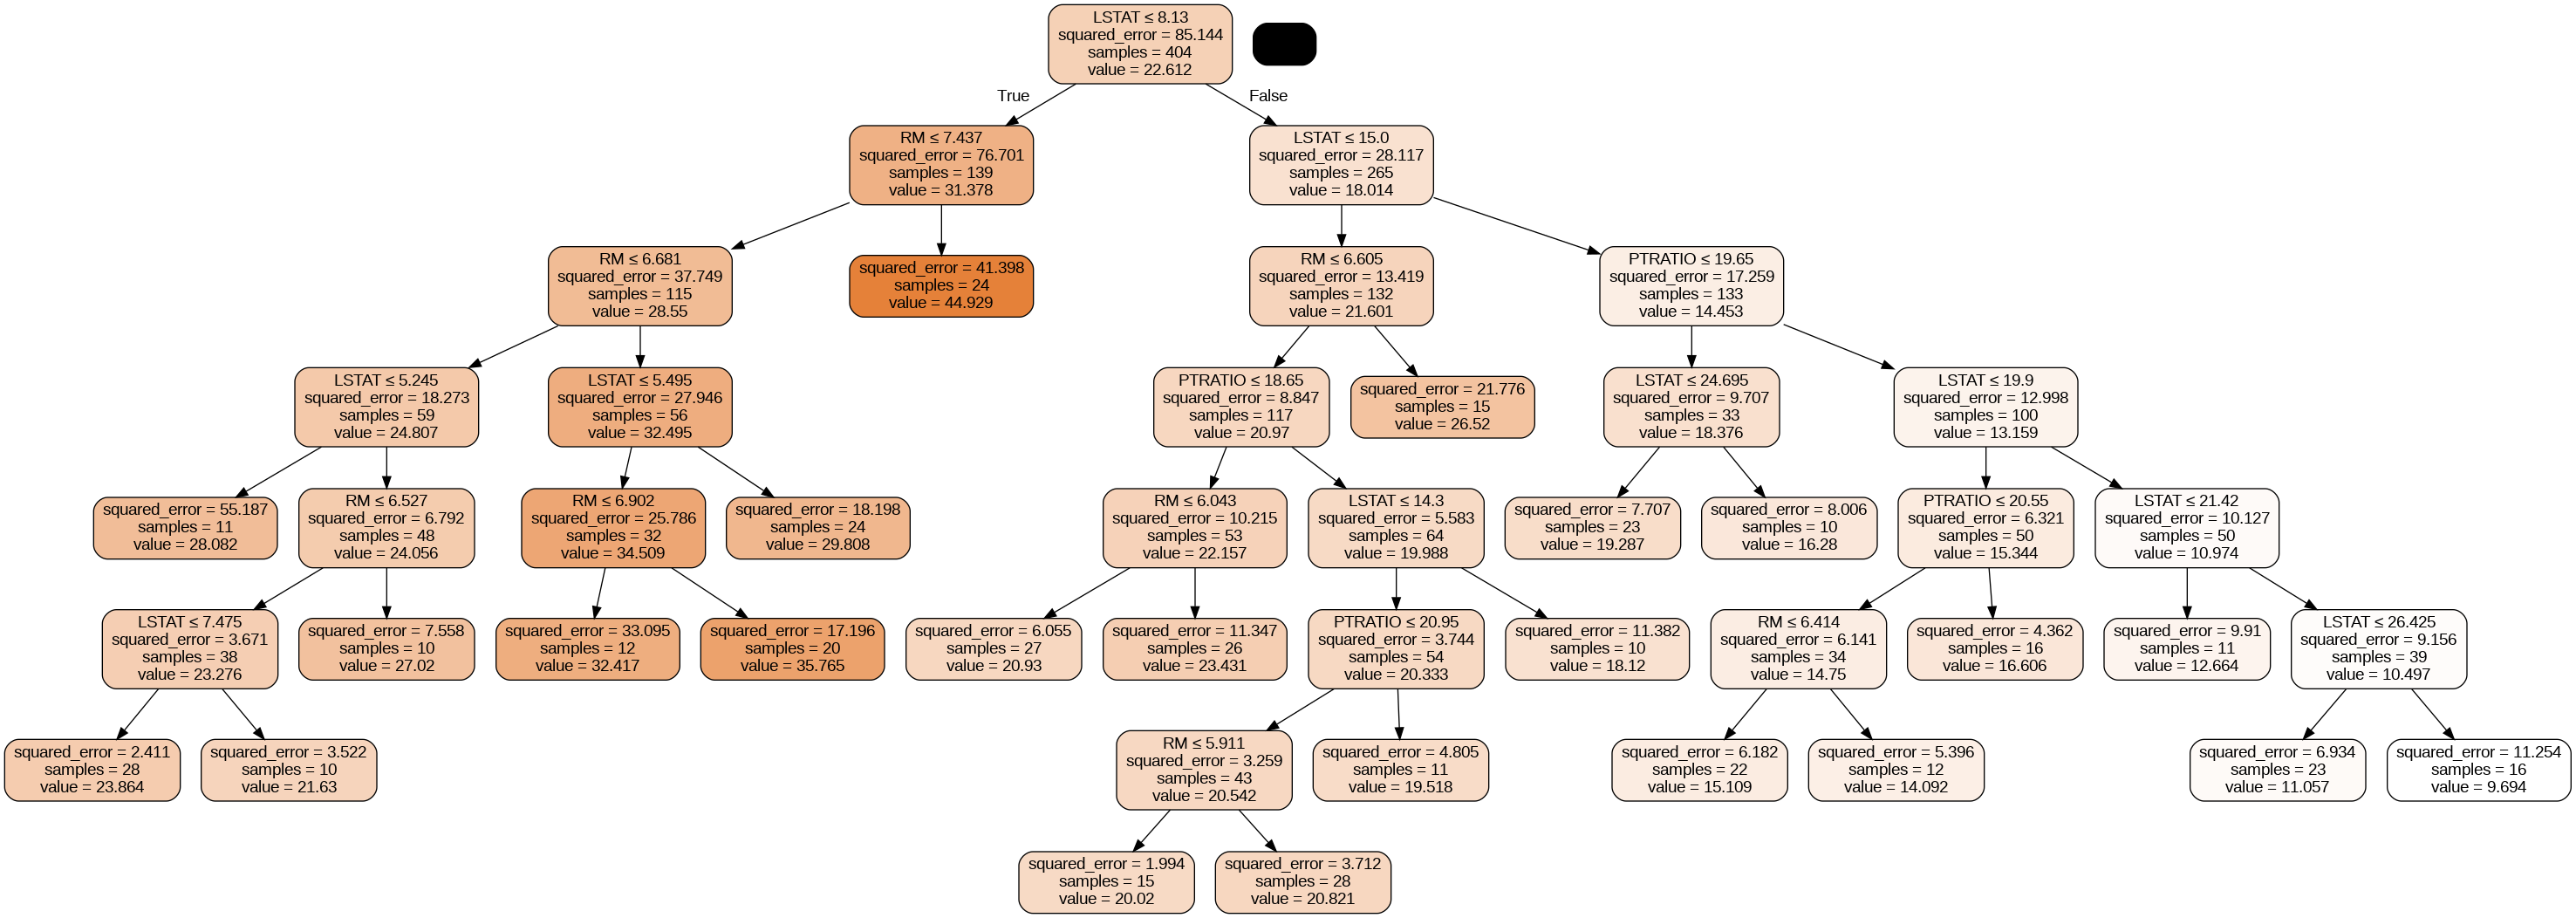

In [198]:
# Visualizar el árbol de decisión

import six
import sys
sys.modules['sklearn.externals.six'] = six

# Import necessary libraries for graph viz
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(RT, feature_names=df_V2.columns[:3], class_names=df_V2.columns[:3],  
                filled=True, rounded=True,
                special_characters=True, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
